In [1]:
import time
start_time=time.time()

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate
import numpy as np
import pandas as pd
import json

from astropy.io import fits
import astropy.units as u

#plt.rcParams["font.family"]="Times New Roman"
#plt.rcParams["font.size"]="20"

Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'Hanel-EON-S-RV'

In [8]:
name_export='Hanel-EON-S'

Input data of the region

In [9]:
dist = 410 #parsecs
pix = 1.0 #arcmin 
seeing = 0.9 #seeing arcsec FWHM

In [10]:
pc = dist*(2*np.pi) / (360 * 60) #arcsec to parsecs
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(0.11926416555294585, 0.045578661994756374)

In [11]:
orion=pd.read_table(str(datapath_obs)+ '/' +data_file+'.csv', delimiter=',',header=None)
orion.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,21.909091,17.022727,17.000000,14.900000,12.700000,12.663636,14.372727,13.754545,14.681818,16.750000,...,16.009091,14.809091,12.631818,8.977273,13.140909,13.336364,17.213636,21.004545,21.140909,22.304545
std,5.934637,10.236440,9.590968,8.592522,8.654644,7.866296,8.226796,9.804505,8.772665,9.225934,...,10.242391,10.542563,11.807237,10.575665,11.307758,11.218163,9.774812,7.873976,8.502922,7.026919
min,8.500000,-1.200000,-2.800000,-0.200000,-1.200000,-0.100000,-1.500000,-5.900000,1.100000,-0.400000,...,1.400000,1.200000,-5.400000,-4.400000,-1.700000,-4.600000,0.300000,-1.200000,-1.000000,1.600000
25%,25.000000,8.275000,7.675000,8.475000,6.525000,7.725000,9.600000,7.300000,6.925000,7.350000,...,6.350000,4.550000,2.575000,2.525000,2.575000,3.800000,6.750000,25.000000,25.000000,25.000000
50%,25.000000,25.000000,25.000000,11.600000,9.400000,10.700000,11.250000,11.750000,12.600000,21.650000,...,25.000000,16.500000,6.700000,5.300000,8.300000,8.600000,25.000000,25.000000,25.000000,25.000000
75%,25.000000,25.000000,25.000000,25.000000,22.575000,16.075000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,20.600000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


In [12]:
#orion[orion == 25] = 'nan' 

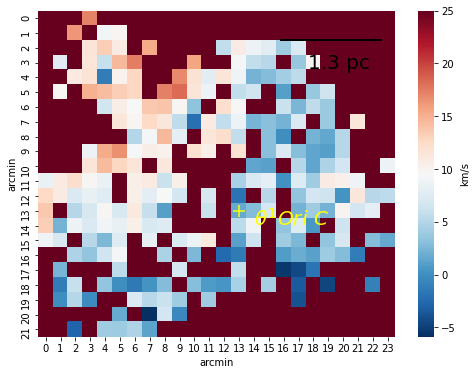

In [13]:
fig, ax = plt.subplots(figsize = (8,6))

sns.heatmap(orion,cmap='RdBu_r',cbar_kws={'label': 'km/s'})

plt.scatter(13.5, 13.5, marker='+', color='yellow', s=150)
ax.set(xlabel='arcmin', ylabel='arcmin')
ax.text(0.93, 0.81, '1.3 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
plt.axhline(y=2, xmin=0.68, xmax=0.96, linewidth=2, color = 'k')
plt.text(14.5, 14.5, '$θ^{1}Ori\ C$', fontsize=20, color='yellow')

plt.show()

Matrix To list

In [14]:
data=orion.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
data.describe()

,X,Y,RV
count,528.000000,528.000000,528.000000
mean,10.500000,11.500000,15.889583
std,6.350305,6.928751,9.806292
min,0.000000,0.000000,-5.900000
25%,5.000000,5.750000,6.700000
50%,10.500000,11.500000,25.000000
75%,16.000000,17.250000,25.000000
max,21.000000,23.000000,25.000000


In [15]:
m=data.RV<25
data=data[m]

In [16]:
data[m].describe()

<ipython-input-16-9541acf80d3b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[m].describe()


,X,Y,RV
count,261.000000,261.000000,261.000000
mean,10.766284,10.597701,6.569732
std,5.222269,6.219312,4.742123
min,0.000000,0.000000,-5.900000
25%,6.000000,5.000000,3.100000
50%,11.000000,10.000000,6.700000
75%,15.000000,16.000000,10.000000
max,21.000000,23.000000,18.300000


<ipython-input-17-ae0f6994de5e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datal=data[m].copy()


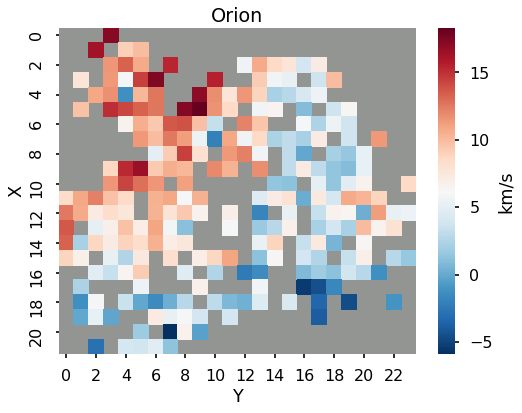

In [17]:
plt.style.use([
    "seaborn-poster",
])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

datal=data[m].copy()

dataH_rv=(datal.round(2)).pivot(index='X', columns='Y', values='RV')
sns.heatmap(dataH_rv, cmap="RdBu_r",cbar_kws={'label': 'km/s'})
plt.title('Orion')
ax.set_facecolor('xkcd:gray')


#plt.savefig('Imgs//VF//N604.pdf', bbox_inches='tight')


Fits file

In [18]:
hdu = fits.PrimaryHDU(dataH_rv)
hdu.writeto(str(datapath_obs)+ '/' +data_file + '.fits')

<ipython-input-19-f0a02e76f95c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(data[m].RV-data[m].RV.mean(),bins=25)


Text(0.5, 6.799999999999979, 'Radial velocity [km/s]')

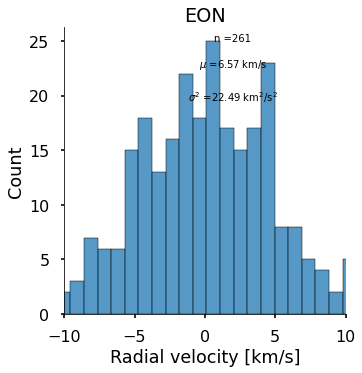

In [19]:
sns.displot(data[m].RV-data[m].RV.mean(),bins=25)
plt.xlim(-10,10)

plt.text(0.45, 0.86,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.78,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.68,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('EON')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')


Export data

In [20]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
         name_export : np.array(data[m]),
      }
data_export_list

<ipython-input-20-9a1e25a474b1>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  name_export : np.array(data[m]),


{'name': 'Hanel-EON-S',
 'pc': 0.11926416555294585,
 's0': 0.045578661994756374,
 'pix': 1.0,
 'Hanel-EON-S': array([[ 0. ,  3. , 17.2],
        [ 1. ,  2. , 16.4],
        [ 1. ,  4. ,  9.1],
        [ 1. ,  5. ,  9.9],
        [ 2. ,  3. , 11.5],
        [ 2. ,  4. , 13.3],
        [ 2. ,  5. , 10.8],
        [ 2. ,  7. , 15.4],
        [ 2. , 12. ,  5.7],
        [ 2. , 13. , 10.8],
        [ 2. , 14. ,  8.6],
        [ 2. , 15. ,  7.8],
        [ 2. , 16. ,  4. ],
        [ 2. , 17. ,  7.2],
        [ 3. ,  1. ,  7.8],
        [ 3. ,  3. , 11.4],
        [ 3. ,  4. ,  6. ],
        [ 3. ,  5. , 14.5],
        [ 3. ,  6. , 17.5],
        [ 3. , 10. , 15.6],
        [ 3. , 13. ,  9.3],
        [ 3. , 14. ,  5.8],
        [ 3. , 15. ,  5.3],
        [ 3. , 17. ,  3.7],
        [ 3. , 18. ,  9.9],
        [ 4. ,  2. , 10.9],
        [ 4. ,  3. , 11.7],
        [ 4. ,  4. , -1.2],
        [ 4. ,  5. , 10.2],
        [ 4. ,  6. , 12.7],
        [ 4. ,  9. , 17. ],
        [ 4. , 10. , 11

In [21]:
data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
#       'sb' :np.array(dataH_f),
       'vv' : np.array(dataH_rv),
#       'ss' : np.array(dataH_s),

      }

data_export_matrix

{'name': 'Hanel-EON-S',
 'pc': 0.11926416555294585,
 's0': 0.045578661994756374,
 'pix': 1.0,
 'vv': array([[ nan,  nan,  nan, 17.2,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan],
        [ nan,  nan, 16.4,  nan,  9.1,  9.9,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan],
        [ nan,  nan,  nan, 11.5, 13.3, 10.8,  nan, 15.4,  nan,  nan,  nan,
          nan,  5.7, 10.8,  8.6,  7.8,  4. ,  7.2,  nan,  nan,  nan,  nan,
          nan,  nan],
        [ nan,  7.8,  nan, 11.4,  6. , 14.5, 17.5,  nan,  nan,  nan, 15.6,
          nan,  nan,  9.3,  5.8,  5.3,  nan,  3.7,  9.9,  nan,  nan,  nan,
          nan,  nan],
        [ nan,  nan, 10.9, 11.7, -1.2, 10.2, 12.7,  nan,  nan, 17. , 11.8,
          7.8, 11.5,  8.9,  2.3,  2.8,  4.2,  5.5,  nan,  nan,  nan,  nan,
          nan,  nan],
        [ nan,  9.7,  nan, 15.1, 14.3, 1

In [22]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [23]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [24]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [25]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.234011888504028 seconds ---


In [26]:
!jupyter nbconvert --to script --no-prompt otv-Hanel-EON-S.ipynb

[NbConvertApp] Converting notebook otv-Hanel-EON-S.ipynb to script
[NbConvertApp] Writing 4080 bytes to otv-Hanel-EON-S.py
